# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
!pip install random

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


In [13]:
import random
N = 10000
#thompson sampling even works in 450 rounds
d = 10
ads_selected = []
no_of_rewards_one, no_of_rewards_zero = [0]*d, [0]*d
total_reward = 0
for n in range(N):
  ad = 0
  max_random = 0
  for i in range(d):
    alpha = no_of_rewards_one[i]
    beta = no_of_rewards_zero[i]
    random_beta = random.betavariate(alpha+1, beta+1)

    if random_beta > max_random:
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 0:
    no_of_rewards_zero[ad]+=1
  else:
    no_of_rewards_one[ad]+=1
  total_reward += reward

## Visualising the results - Histogram

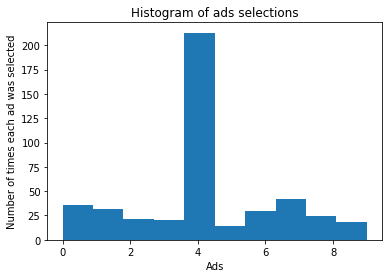

In [14]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()